# Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? **Note:** to make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering.


- (5 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{1}{999},\dots \frac{1}{2}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter
    - Chebyshev iteration
    - Conjugate gradient method

## Solution

1) Consider the $k$-th column of $AXB$:

$$(AXB)_{:,k} = AX\overline{b_k} = A\sum_{i=1}^m\overline{x_i}b_{ik} = \begin{bmatrix}
b_{1k}A & b_{2k}A & \dots & b_{mk}A  
\end{bmatrix}\cdot\begin{bmatrix}
\overline{x_1}\\
\overline{x_2}\\
\vdots\\
\overline{x_m}
\end{bmatrix} = \left[\overline{b}_k^T\otimes A\right]\cdot\begin{bmatrix}
\overline{x_1}\\
\overline{x_2}\\
\vdots\\
\overline{x_m}
\end{bmatrix}$$

where $\overline{x_i}, \overline{b_j}$ are columns of matriced $X$ and $B$, resp, i.e. $B = [\overline{b_1},\dots,\overline{b_n}]$, $X = [\overline{x_1},\dots,\overline{x_m}]$. So we see that

$$(B^T\otimes A)vec(X) = vec(AXB)$$

2) Let $\{u_1, \dots, u_m\}$. $\{v_1, \dots, v_n\}$ be sets of eigenvectors of $A$ and $B$ with $\{\lambda_1, \dots, \lambda_m\}$, $\{\mu_1, \dots, \mu_m\}$. It can be easily see that $u_i\otimes v_j$ is an eigenvector of $A\otimes I + I\otimes B$ with eigenvalue $\lambda_i + \mu_j$. Indeed,

$$(A\otimes I + I\otimes B)\cdot(u_i\otimes v_j) = Au_i\otimes v_j + u_i\otimes Bv_j = \lambda_iu_i\otimes v_j + u_i\otimes \mu_jv_j = \lambda_i(u_i\otimes v_j) + \mu_j(u_i\otimes v_j) = (\lambda_i + \mu_j)\cdot(u_i\otimes v_j)$$

Hence $\Lambda_{A\otimes I + I\otimes B} = \Lambda_A\otimes I + I\otimes \Lambda_B$ and $S_{A\otimes I + I\otimes B} = S_A\otimes S_B$.

3) **Richardson iteration with optimal parameter** 

We know that the optimal value of $\tau = \frac{2}{\lambda_\text{max} + \lambda_\text{min}} = \frac{2}{1000.0001}$. In this case error $e_k = x_k - x_*$ can be expressed in terms of $e_0$ as follows

$$e_k = (I-\tau A)^ke_0$$

We want to make relative error $e_k\leq10^{-4}$, so

$$\|e_k\|\leq\|I-\tau A\|^k\|e_0\|\leq 10^{-4}\Rightarrow k\leq\frac{\log(10^{-4}\|e_0\|^{-1})}{\log\|I-\tau A\|}$$

So we need at most $\frac{\log(10^{-4}\|e_0\|^{-1})}{\log\|I-\tau A\|}$ iterations.

**Chebyshev iteration**

Here $\text{cond}(A) = \frac{|\lambda_\text{max}|}{|\lambda_\text{min}| }= 10^6$. We know from lectures the following inequality for relative errors

$$
\frac{\| x_k - x_* \|_A}{\|x_*\|_A} \leq C \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)^k \leq 10^{-4} \implies k \leq \frac{\log (10^{-4}C^{-1})}{\log \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)}
$$

So we need at most $\frac{\log (10^{-4}C^{-1})}{\log \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)}$ iterations.

**CG**

We have the same inequality for CG as for Chebyshev iteration method.

$$
\frac{\| x_k - x_* \|_A}{\|x_*\|_A} \leq C \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)^k \leq 10^{-4} \implies k \leq \frac{\log (10^{-4}C^{-1})}{\log \left(\frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1}\right)}
$$

# Problem 2 (30 pts)

## Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to one part of a graph and negative values to another.


#### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* Implement the spectral partitioning as the function ```partition```:

In [30]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg as spla
import networkx as nx
import trimesh
import pyglet
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [37]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):  # 10 pts
   
    def orth(x):
        e = np.ones_like(x)
        proj = (e @ x) / (e @ e) * e
        return x - proj
   
    def condition(e, k):
        rel = (np.linalg.norm(e[k] - e[k - 1])) / np.linalg.norm(e[k])
        assert len(e) >= 2
        if rel <= eps:
            return True
        else:
            return False
 
    diagonal = np.sum((A > 0), axis = 1)
    D = scipy.sparse.spdiags(diagonal.reshape(1, -1), [0], A.shape[0], A.shape[1],format = 'csr')
    L = D - A
    x = x0
    eigenvalues = [((A @ x) @ x)/(x @ x)]
   
    I = scipy.sparse.identity(L.shape[0])
    x = orth(x)
    x /= np.linalg.norm(x)
    for i in range(num_iter_fix):
        shifted_L = L - shift * I
        x = orth(scipy.sparse.linalg.spsolve(shifted_L, x))
        x /= np.linalg.norm(x)
        lambda_i = ((L @ x) @ x)/(x @ x)
        eigenvalues.append(lambda_i)
       
        if(condition(eigenvalues, i)):
            return x, np.array(eigenvalues)
    for i in range(num_iter_fix, num_iter_adapt + num_iter_fix):
        shift_R = float(((L @ x) @ x)/(x @ x))
        shifted_L = L - shift_R * I
        x = orth(scipy.sparse.linalg.spsolve(shifted_L, x))
        x /= np.linalg.norm(x)
        lambda_i = ((L @ x) @ x)/(x @ x)
        eigenvalues.append(lambda_i)
               
        if(condition(eigenvalues, i)):
            return x, np.array(eigenvalues)
   
    eigs = np.array(eigenvalues)
    return x, eigs

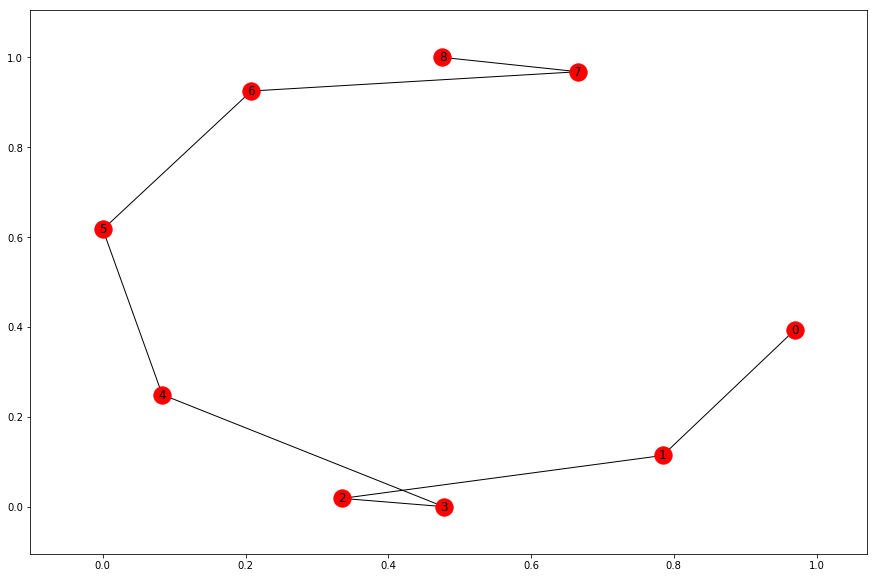

In [38]:
n = random.randint(1,25)
m = random.randint(1,15)
G = nx.lollipop_graph(m,n)
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [39]:
A = nx.adjacency_matrix(G)
x, eigs = partition(A ,shift=0.0001, num_iter_fix=5, num_iter_adapt=5, x0=np.random.random(m+n), eps=1e-5)

In [40]:
x

array([ -4.64242827e-01,  -4.08248290e-01,  -3.03012985e-01,
        -1.61229842e-01,   8.71002532e-18,   1.61229842e-01,
         3.03012985e-01,   4.08248290e-01,   4.64242827e-01])

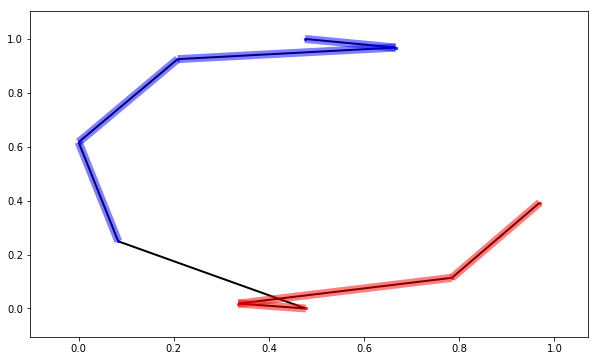

In [41]:
red = [i for i in range(m+n) if x[i]<0] 
blue =[i for i in range(m+n) if x[i]>0] 
plt.figure(figsize=(10,6))
nx.draw_networkx_nodes(G,pos, nodelist=red,node_color='r',node_size=len(red),alpha=0.8)
nx.draw_networkx_nodes(G,pos, nodelist=blue,node_color='b',node_size=len(blue),alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,width=2)
red_edges =[]
blue_edges =[]
for e in nx.edges(G):
    if e[0] in red and e[1] in red:
        red_edges.append(e)
    if e[0] in blue and e[1] in blue:
        blue_edges.append(e)
nx.draw_networkx_edges(G,pos,edgelist=red_edges,width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,edgelist=blue_edges,width=8,alpha=0.5,edge_color='b')
plt.show()

In [25]:
x, eigs = partition(A ,shift=0.0001, num_iter_fix=0, num_iter_adapt=5, x0=np.random.random(m+n), eps=1e-5)

In [26]:
x

array([ 0.00510274,  0.00510274,  0.00510274,  0.00510274,  0.00510274,
        0.00510274,  0.00510274,  0.00510274, -0.01484508, -0.11639479,
        0.23707011, -0.33622782,  0.40486787, -0.43676018,  0.42901004,
       -0.38232089,  0.30093046, -0.19222614,  0.06607446])

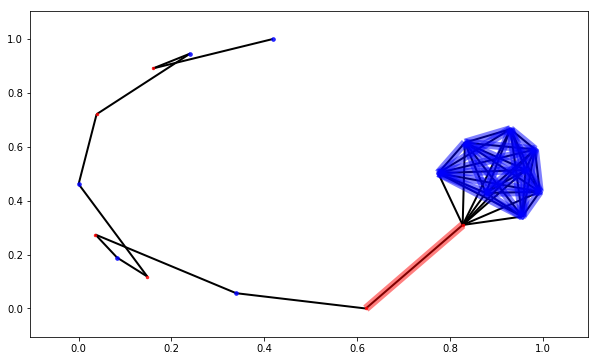

In [27]:
red = [i for i in range(m+n) if x[i]<0] 
blue =[i for i in range(m+n) if x[i]>0] 
plt.figure(figsize=(10,6))
nx.draw_networkx_nodes(G,pos, nodelist=red,node_color='r',node_size=len(red),alpha=0.8)
nx.draw_networkx_nodes(G,pos, nodelist=blue,node_color='b',node_size=len(blue),alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,width=2)
red_edges =[]
blue_edges =[]
for e in nx.edges(G):
    if e[0] in red and e[1] in red:
        red_edges.append(e)
    if e[0] in blue and e[1] in blue:
        blue_edges.append(e)
nx.draw_networkx_edges(G,pos,edgelist=red_edges,width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,edgelist=blue_edges,width=8,alpha=0.5,edge_color='b')
plt.show()

We can see that if num_iter = 0 elements of x are very close to zero, because matrix is close to singular. Therefore there can be mistakes in partition.

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \epsilon$ at some step $k$.

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` do not work in this case. Therefore, we first use a very small shift instead.

* Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

#### Stanford Bunny (15 pts)

Let us now find a partition of a large graph, obtained from the 3D model from [The Stanford 3D Scanning Repository](http://graphics.stanford.edu/data/3Dscanrep/):<img src="stanford-bunny.jpg" width='250'>

* Install the [trimesh](https://pypi.python.org/pypi/trimesh) library. In order to visualize 3D model smoothly you will also need to install `pyglet` library (see trimesh instructions). Alternatively, you can draw and rotate model using 3D scatter in `matplotlib` with `%matplotlib notebook`.


* Download the 3D model of the bunny [here](https://drive.google.com/open?id=1H_pqd2fInkkCKF5R9voVFJM53233G-Ax).


* You can read it and display with `mesh = trimesh.load(<path>)` and `mesh.show()` respectively. Coordinates of the vertices and faces can be accessed with `mesh.vertices` and `mesh.faces` respectively. Note that not every vertex is a part of a face, you should filter them out.


* Create an adjacency matrix of the graph corresponding to the mesh of the model (you can use `networkx` library for this). Verify that the number of connected components of the graph is exactly $1$.


* Find the "bunny" partitioning for `num_iter_fix=1, num_iter_adapt=2` and `num_iter_fix=2, num_iter_adapt=10`. Plot the convergence rate for the second case and discuss it. Draw 3D model with coloring according to the partitions. With `trimesh` you can assign vertex colors as `mesh.visual.vertex_colors[<vertex>] = (R,G,B,A)`.

In [12]:
mesh = trimesh.load('bun_zipper.ply')

mesh.show()


NotImplementedError: abstract

## Problem 3 (30 pts)

## Sparse matrices and linear solvers

Consider a 2D convection-diffusion equation in $\Omega = [0,1]^2$
$$
-\frac{\partial^2 u}{\partial x^2}  -\frac{\partial^2 u}{\partial y^2} + \frac{\partial u}{\partial x} + \frac{\partial u}{\partial y} = f(x,y), \quad (x,y)\in \Omega
$$ 
with zero Dirichlet boundary conditions
$$
u_{\partial \Omega} = 0,
$$
with known function $f(x,y)$ and unknown $u(x,y)$.

To find solution of this equation we will use the **finite difference method**. 
Standard second order finite difference discretization on a uniform grid $(x_i, y_j) = (ih, jh)$, $i,j = 0,\dots, N$, $h = \frac{1}{N}$ leads to the following system of equations:

$$
\begin{split}
   &-\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}  -\frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{h^2} + \frac{u_{i+1, j} - u_{i,j}}{h} + \frac{u_{i, j+1} - u_{i,j}}{h} = f(ih, jh) \\
   &u_{0,j} = u_{i,0} = u_{N,j} = u_{i,N} = 0, \quad i,j = 0,\dots,N,
\end{split}
$$

* Write the system above as a matrix equation $BU_h + U_h C = F_h$ with  matrices $U_h = \begin{bmatrix}u_{1,1} & \dots & u_{1,N-1} \\ \vdots & \ddots & \vdots \\ u_{N-1,1} & \dots & u_{N-1,N-1} \end{bmatrix}$, $F_h = \begin{bmatrix}f_{1,1} & \dots & f_{1,N-1} \\ \vdots & \ddots & \vdots \\ f_{N-1,1} & \dots & f_{N-1,N-1} \end{bmatrix}$. What are matrices $B$ and $C$?

* Using Kronecker product properties rewrite **analytically** $ BU_h + U_h C = F_h$ as $A_h \mathrm{vec}(U_h) = \mathrm{vec}(F_h)$, where $\mathrm{vec}(\cdot)$ is a columnwise reshape.
What is matrix $A_h$?

* Choose $f(x,y) = 1$. 
 Solve the system with this $f$ using the `scipy.sparse.linalg.spsolve` which is direct sparse solver. 
 Use ```pandas``` library and print table that contains $N$ and time of solving for $N=127, 255, 511$. 
 Matrices $B, C$ and $A_h$ should be assembled in the `CSR` format using functions from the `scipy.sparse` package (functions `scipy.sparse.kron` and `scipy.sparse.spdiags` will be helpful). <font color='red'> Do not use full matrices! Use only sparse arithmetics. </font>

### Solution:

$F_h = \begin{bmatrix}f_{1,1} & \dots & f_{1,N-1} \\ \vdots & \ddots & \vdots \\ f_{N-1,1} & \dots & f_{N-1,N-1} \end{bmatrix} = BU_h + U_h C $,

where $B = -\frac{1}{h^2}\begin{bmatrix}-2 & 1 & \dots & \dots\\ 1 & -2 & 1 &\dots\\ \vdots & \ddots & \ddots & \vdots \\ \dots & \dots &\dots & -2 \end{bmatrix} + \frac{1}{h}\begin{bmatrix}-1 & 1 & \dots & \dots\\ 0 & -1 & 1 &\dots\\ \vdots & \ddots & \ddots & \vdots \\ \dots & \dots &\dots & -1 \end{bmatrix} = N^2\mathrm{tridiag\left( 1,-2,1\right)} + N\mathrm{bidiag \left( -1,1 \right)}$

and $C = -\frac{1}{h^2}\begin{bmatrix}-2 & 1 & \dots & \dots\\ 1 & -2 & 1 &\dots\\ \vdots & \ddots & \ddots & \vdots \\ \dots & \dots &\dots & -2 \end{bmatrix} + \frac{1}{h}\begin{bmatrix}1 & -1 & \dots & \dots\\ 0 & 1 & -1 &\dots\\ \vdots & \ddots & \ddots & \vdots \\ \dots & \dots &\dots & 1 \end{bmatrix} = N^2\mathrm{tridiag\left( 1,-2,1\right)} + N\mathrm{bidiag \left( 1, -1 \right)}$

$$\mathrm{vec}(F_h) = \mathrm{vec}(BU_h + U_h C) = \mathrm{vec}(BU_h) + \mathrm{vec}(U_hC) = \mathrm{vec}(BU_hI) + \mathrm{vec}(IU_hC) = (I \otimes B + C^T \otimes I) \mathrm{vec}(U_h)$$

$$\Rightarrow A_h = I \otimes B + C^T \otimes I$$

In [13]:
# INPUT: dimension of the grid along the one side of the square
# OUTPUT: matrix A_h for 2D convection-diffusion problem in CSR sparse format 
def build_matrix(N):  # 5 pts
    ex = np.ones(N - 1)
    diag_rows = np.array([ex, -2 * ex, ex])
    positions = [-1, 0, 1]
    B_1 = sp.sparse.spdiags(diag_rows, positions, N-1 , N-1 ) * N** 2
    diag_rows = np.array([-1 * ex, ex])
    positions = [0, 1]
    B_2 = sp.sparse.spdiags(diag_rows, positions, N-1 , N-1 ) * N 
    B = B_2 - B_1
    C_1 = B_1
    positions = [1, 0]
    C_2 = sp.sparse.spdiags(diag_rows, positions, N-1 , N-1 ) * N
    I = sp.sparse.eye(N - 1)
    C = C_2 - C_1
    A = sp.sparse.kron(I, B, format='csr') + sp.sparse.kron(C.T, I, format='csr')
    # Your code is here
    return A

In [14]:
N = [127,255,511]
times =[]
for n in N:
    b = np.ones((n-1)**2)
    A = build_matrix(n)
    t = time.time()
    u = spla.spsolve(A, b)
    t = time.time() - t
    times.append(t)
  
d = {'N': N, 'time': times}
df = pd.DataFrame(data=d)
print (df)


     N      time
0  127  0.257295
1  255  0.411966
2  511  2.975454


* Fix initial random guess $x_0$, maximal number of iterations and required tolerance. These parameters will be the same for all iterative methods that you will test
* Run `cg`, `minres`, `GMRES`, `BicgStab` from `scipy.sparse.linalg` package with generated matrix for 2D convection-diffusion equation, right-hand side $f(x, y) = 1$ and above described parameters.
* What are the iterative methods diverge and why?
* What are the iterative methods of choice? Explain why. 

* Plot the relative residual norm $\frac{\|Ax_k - f\|_2}{\|f\|_2}$ w.r.t number of iteration and w.r.t elapsed time. Assume that every iteration lasts the same number of seconds
* Run the methods of choice with and without ILU0 preconditioner (use it from `scipy.sparse` package) and Block Jacobi preconditioner for $N=256$. You should implement Block Jacobi preconditioner in the most efficient manner, in particular the most complex operation is solve linear systems with $N \times N$ matrix and multiple right-hand sides. Plot relative error w.r.t iteration number for both cases and for both preconditioners on one plot. Don't forget add legend. Also plot relative error w.r.t time in the similar way. Assume that every iteration lasts the same number of seconds

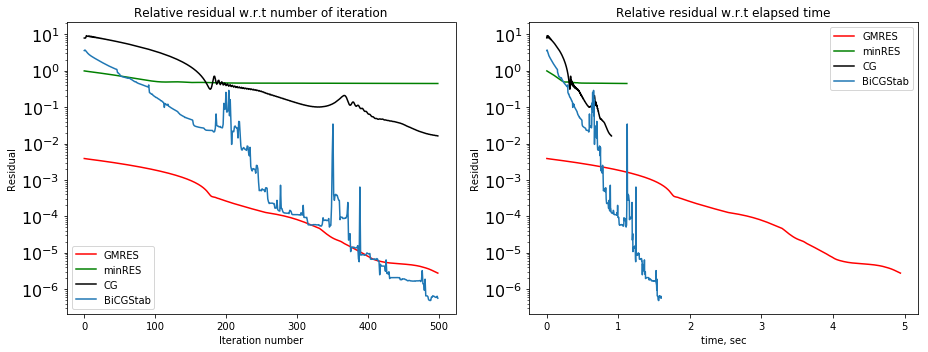

In [15]:
n = 256
tol = 1e-16
maxiter = 500
x_0 = np.zeros((n-1)**2)
lp = build_matrix(n)
rhs = np.ones((n-1)**2)

res_cg = []
res_bicg = []
res_gmres = []
res_minres = []

def print_cg(x):
    res_cg.append(np.linalg.norm(lp.dot(x) - rhs,2)/np.linalg.norm(rhs,2))


def print_minres(x):
    res_minres.append(np.linalg.norm(lp.dot(x) - rhs,2)/np.linalg.norm(rhs,2))

    
def print_gmres(r):
    res_gmres.append(np.linalg.norm(r) / np.linalg.norm(rhs))


def print_bicg(x):
    res_bicg.append(np.linalg.norm(lp.dot(x) - rhs,2)/np.linalg.norm(rhs,2))
    
plt.figure(figsize=(13,5))
# Gmres
st = time.time()
scipy.sparse.linalg.gmres(lp, rhs, x0=x_0, restart=n, tol=tol,maxiter=maxiter, callback=print_gmres)
current_time = time.time() - st
plt.subplot(1, 2, 1)
plt.semilogy(np.array(res_gmres),color='r', label='GMRES')
plt.subplot(1, 2, 2)
plt.semilogy([current_time * i / len(res_gmres) for i in range(len(res_gmres))], np.array(res_gmres), 
                 color='r', label='GMRES')

#Minres
st = time.time()
scipy.sparse.linalg.minres(lp, rhs, x0=x_0,  tol=tol,maxiter=maxiter,callback=print_minres)
current_time = time.time() - st
plt.subplot(1, 2, 1)
plt.semilogy(np.array(res_minres), color='g', label='minRES')
plt.subplot(1, 2, 2)
plt.semilogy([current_time * i / len(res_minres) for i in range(len(res_minres))], np.array(res_minres), 
                color='g', label='minRES')

#CG
st = time.time()
scipy.sparse.linalg.cg(lp, rhs, x0=x_0,  tol=tol,maxiter=maxiter,callback=print_cg)
current_time = time.time() - st
plt.subplot(1, 2, 1)
plt.semilogy(np.array(res_cg), color='k', label='CG')
plt.subplot(1, 2, 2)
plt.semilogy([current_time * i / len(res_cg) for i in range(len(res_cg))], np.array(res_cg), 
                color='k', label='CG')

#BICGStab
st = time.time()
scipy.sparse.linalg.bicgstab(lp, rhs, x0=x_0,  tol=tol,maxiter=maxiter,callback=print_bicg)
current_time = time.time() - st
plt.subplot(1, 2, 1)
plt.semilogy(np.array(res_bicg), label='BiCGStab')
plt.subplot(1, 2, 2)
plt.semilogy([current_time * i / len(res_bicg) for i in range(len(res_bicg))], np.array(res_bicg),label='BiCGStab')



plt.subplot(1, 2, 1)
plt.legend(loc='best')
plt.title("Relative residual w.r.t number of iteration")
plt.xlabel('Iteration number')
plt.ylabel('Residual')
plt.yticks(fontsize=16)
plt.subplot(1, 2, 2)
plt.legend(loc='best')
plt.title("Relative residual w.r.t elapsed time")
plt.xlabel('time, sec')
plt.ylabel('Residual')
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Initial solution: zeros. The method of choice among cg, minres, GMRES, BicgStab for this problem is BiCGStab. It has the best convergence. CG  works for symmetric positive-definite matrices, and (sometimes) for symmetric matrices. It completely does not work for the non-symmetric matrices. The main disadvantage of GMRES: we have to store all the vectors, so the memory costs grows with each step. This problem is solved by restarts, generating new Krylov subspace. Minres works only for symmetric systems. Then, BicgStab gives best accuracy.

I will use <b>csc</b> format of sparse matrix for BicgStab with ILU.

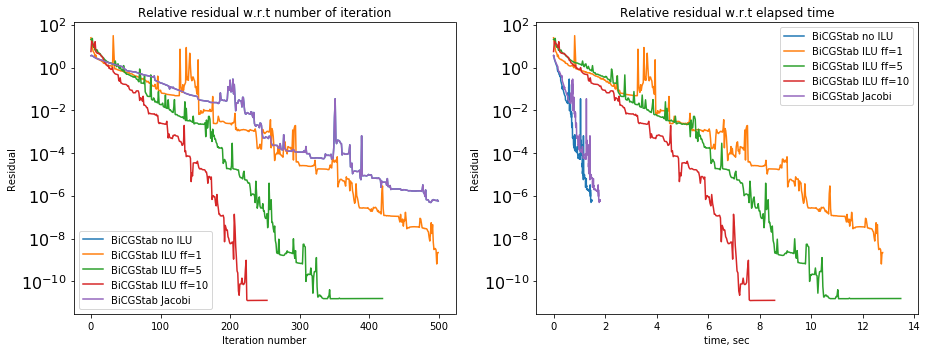

In [16]:
n = 256
tol = 1e-16
res_bicg_ilui = []
lp = build_matrix(n)
A = scipy.sparse.csc_matrix(lp)
b = np.ones((n-1)**2)
x_0 = np.zeros((n-1)**2)
maxiter = 500
parameters = [1,5,10]
lim = 500

plt.figure(figsize=(13,5))
st = time.time()
scipy.sparse.linalg.bicgstab(A, b, x0=x_0,  tol=tol,maxiter=maxiter,callback=print_bicg)
current_time = time.time() - st
plt.subplot(1, 2, 1)
plt.semilogy(np.array(res_bicg[:lim]), label='BiCGStab no ILU')
plt.subplot(1, 2, 2)
plt.semilogy([current_time * i / len(res_bicg[:lim]) for i in range(len(res_bicg[:lim]))], np.array(res_bicg[:lim]),
             label='BiCGStab no ILU')

def print_bicg_ilui(x):
    res_bicg_ilui.append(np.linalg.norm(A.dot(x) - b,2)/np.linalg.norm(b,2))

for p in parameters:
    res_bicg_ilui = []
    ilu = scipy.sparse.linalg.spilu(A, fill_factor=p)
    M_x = lambda x: ilu.solve(x)
    M = scipy.sparse.linalg.LinearOperator(((n - 1) ** 2, (n - 1) ** 2), M_x)
    st = time.time()
    scipy.sparse.linalg.bicgstab(A, b, x0=x_0, tol=tol,maxiter=maxiter, callback=print_bicg_ilui, M = M)
    current_time = time.time() - st
    plt.subplot(1, 2, 1)
    plt.semilogy(np.array(res_bicg_ilui), label='BiCGStab ILU ff={0}'.format(p))
    plt.subplot(1, 2, 2)
    plt.semilogy([current_time * i / len(res_bicg_ilui) for i in range(len(res_bicg_ilui))], np.array(res_bicg_ilui),
                 label='BiCGStab ILU ff={0}'.format(p))

res_bicg_ilui = []    
diag_row = [(2*n)**2 * np.ones((n-1)**2)]
positions = [0]
M_jacobi = sp.sparse.spdiags(diag_row, positions, (n - 1) ** 2 , (n - 1) ** 2)
st = time.time()
scipy.sparse.linalg.bicgstab(lp, b, x0=x_0, tol=tol,maxiter=maxiter, callback=print_bicg_ilui, M = M_jacobi)
current_time = time.time() - st
plt.subplot(1, 2, 1)
plt.semilogy(np.array(res_bicg_ilui), label='BiCGStab Jacobi')
plt.subplot(1, 2, 2)
plt.semilogy([current_time * i / len(res_bicg_ilui) for i in range(len(res_bicg_ilui))], np.array(res_bicg_ilui),
                label='BiCGStab Jacobi')


plt.subplot(1, 2, 1)
plt.legend(loc='best')
plt.title("Relative residual w.r.t number of iteration")
plt.xlabel('Iteration number')
plt.ylabel('Residual')
plt.yticks(fontsize=16)
plt.subplot(1, 2, 2)
plt.legend(loc='best')
plt.title("Relative residual w.r.t elapsed time")
plt.xlabel('time, sec')
plt.ylabel('Residual')
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

We can see that BicgStab with Incomplete LU converges faster but takes more time. On the other hand, BicgStab with Jacobi (diagonal of A) preconditioner converges like a BICGStab without ILU, because A has the same diagonal entries (proportional to the identity matrix). So, we see that for sparse matrices Incomplete LU gives better solution. 

# Problem 4 (30 pts)

## Again QR, oh no!
<img src='qrcode.jpg', width=300px>

* In this problem you asked to find the convolution of the $n\times n$, $n=512$ QR(-code)  with the following filter
$$
T_{i_1j_1,i_2j_2} \equiv T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi} e^{-\alpha \left[(i_1 - j_1)^2 + (i_2 - j_2)^2 \right]}, \quad i_1,j_1, i_2, j_2 = 1,\dots, n, \quad \alpha = \frac{1}{100}
$$
using FFT. 
    * Write function `matvec` that produces multiplication of $T$ by a given vector $x$. 
    * Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
    * Convolve `qrcode.jpg` with $T$ for $\alpha = \frac{1}{100}$.Plot the result as an image. 
    * What is the complexity of this operation? 
    *
**Note:** You can use standart FFT, from e.q. `numpy.fft`


* Run an appropriate Krylov method(s) with the obtained Linear Operator and try to reconstruct back QR-code using the right-hand side from the first bullet (smoothed QR-code). 
* On one figure plot norm of residual with respect to the number of iterations for $\alpha = \{\frac{1}{50},~~\frac{1}{100},~~\frac{1}{200}\}$ and corresponding right hand side. Comment on the results.


* **Bonus:** Find image `noisy_extra.jpg` in the attached to this problem set file. This image is the QR-code with the beautiful message, convolved with $T$, parameter $\alpha=\frac{1}{100}$ plus small random noise:
<img src='noisy_extra.jpg', width=300px>
    * Your goal now is to get the link from the image. Since the problem is very ill-posed you need some regularization, denoising or anything else.

In [32]:
#Function that will be provided into scipy.sparse.linalg.LinearOperator
#INPUT:  1D array vec and 
#        alpha with default value==1/100.
#OUTPUT: 1D array
#Hint: you can vary alpha using lambda function as argument of linalg.LinearOperator:
#      e.q.   lambda x: matvec(x, 1/50.)
def matvec(vec, alpha=1/100.):  # 15 pts
    if (np.sqrt(len(vec)) % 1) > 0:
        return np.zeros(len(vec))
    else:
        n = np.int(np.sqrt(len(vec)))
        ar = np.hstack((range(n), range(-n+1, 0, 1)))
        diff_1, diff_2 = np.meshgrid(ar, ar)
        circulant = alpha/np.pi * np.exp(-alpha*(diff_1**2 + diff_2**2))
        matrix = np.zeros((2*n-1, 2*n-1))
        matrix[:n, :n] = vec.reshape((n, n))
        result = np.fft.ifft2(np.fft.fft2(circulant)*np.fft.fft2(matrix))[:n,:n]
        result = result.real
        return result.reshape((-1))

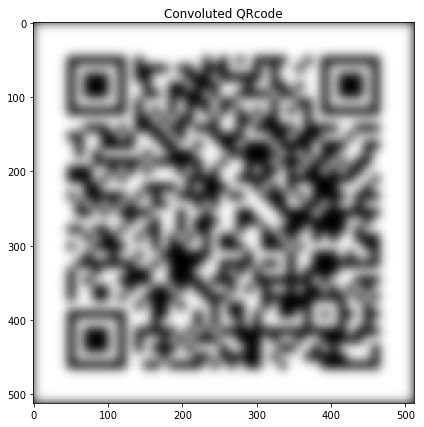

In [34]:
from PIL import Image
code = np.array(Image.open('qrcode.jpg'), dtype=np.float64)
n = code.shape[0]
M = lambda x: matvec(x, alph)
T = spla.LinearOperator((n*n,n*n), matvec=M)

code_convoluted = T.dot(code.reshape((-1))).reshape(n, n)
plt.figure(figsize=(7,7))
plt.imshow(code_convoluted, cmap='gray')
plt.title('Convoluted QRcode')

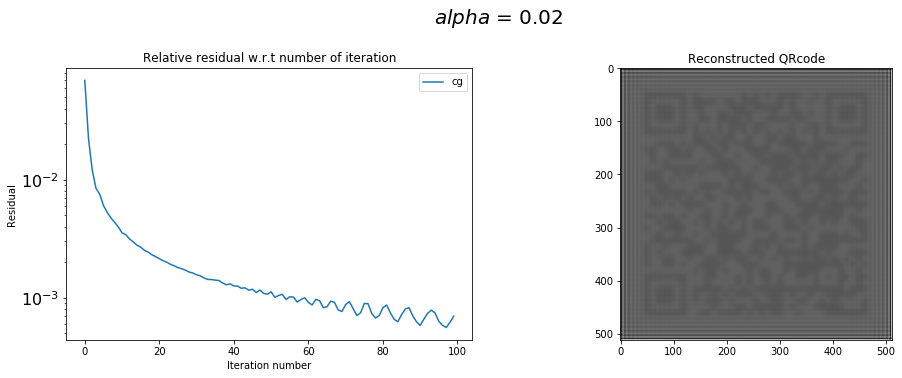

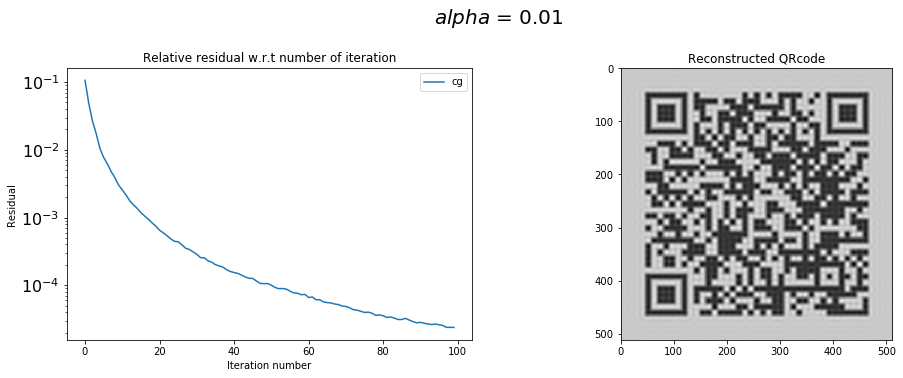

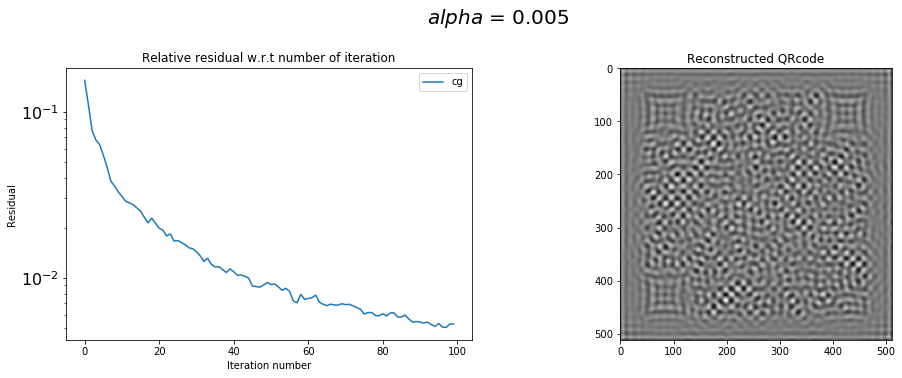

In [19]:
def print_cg(x):
    residuals.append(np.linalg.norm(T.dot(x) - F,2)/np.linalg.norm(F,2))

tol = 1e-06
F = code_convoluted.reshape((-1))
alphas = np.asarray([1./50, 1./100, 1./200])

for i in alphas:
    alph = i
    residuals = []
    M = lambda x: matvec(x, alph)
    T = spla.LinearOperator((n*n,n*n), matvec=M)
    code_reconstructed = spla.cg(T, F, maxiter=100, tol = tol, callback=print_cg)[0].reshape(n, n)
    plt.figure(figsize=(16, 5))
    plt.suptitle('$alpha$ = %s'%i, y=1.05, fontsize=20)
    
    plt.subplot(1, 2, 1)
    plt.semilogy(residuals, label='cg')
    plt.legend(loc='best')
    plt.title("Relative residual w.r.t number of iteration")
    plt.xlabel('Iteration number')
    plt.ylabel('Residual')
    plt.yticks(fontsize=16)
    
    plt.subplot(1, 2, 2)
    plt.imshow(code_reconstructed, cmap='gray')
    plt.title('Reconstructed QRcode')
    
    plt.show()

We have symmetric matrix, so Conjugate gradient is the choice to make reconstruction. For alpha = $\frac{1}{50}$ we get interesting residual plot: it converges first iterations, and then start to fluctuate. For 'real' alpha we get reconstructed QRcode, which is have sufficient quality. On the other hand, BicgStab also gives good solution.